In [1]:
import json

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from ev.optimization.run_cases import load_case_results, get_best_case
from ev.utils import save_figs

/opt/anaconda3/envs/hopp/lib/python3.8/site-packages/pyoptsparse/pyOpt_MPI.py:68: UserWarning: mpi4py could not be imported. mpi4py is required to use the parallel gradient analysis and parallel objective analysis for non-gradient based optimizers. Continuing using a dummy MPI module from pyOptSparse.
  warnings.warn(warn)


/Users/cirmas/workspace/HOPP/ev/notebooks/log/hybrid_systems_2024-01-17T17.42.39.203632.log


In [2]:
sns.set_theme()

In [3]:
figs = {}
SAVE_FIGS = True

In [4]:
cases = load_case_results("sweep_battery")

cases

[{'case': {'battery_capacity_kw': 600,
   'battery_capacity_kwh': 4800,
   'threshold_kw': 500,
   'missed_allowed': 30},
  'technologies': {'pv': {'system_capacity_kw': 571.113083868406},
   'wind': {'turbine_rating_kw': 683.4899237916391},
   'battery': {'system_capacity_kw': 600, 'system_capacity_kwh': 4800}},
  'lcoe_real': 0.09493891835424209,
  'avg_missed_peak_load': 29.999531005838016},
 {'case': {'battery_capacity_kw': 600,
   'battery_capacity_kwh': 1800,
   'threshold_kw': 500,
   'missed_allowed': 30},
  'technologies': {'pv': {'system_capacity_kw': 657.024437941692},
   'wind': {'turbine_rating_kw': 956.2140337303297},
   'battery': {'system_capacity_kw': 600, 'system_capacity_kwh': 1800}},
  'lcoe_real': 0.090517410921736,
  'avg_missed_peak_load': 29.990886001173823},
 {'case': {'battery_capacity_kw': 600,
   'battery_capacity_kwh': 4200,
   'threshold_kw': 500,
   'missed_allowed': 30},
  'technologies': {'pv': {'system_capacity_kw': 574.3768287512047},
   'wind': {'tur

Text(0, 0.5, 'LCOE ($/kWh)')

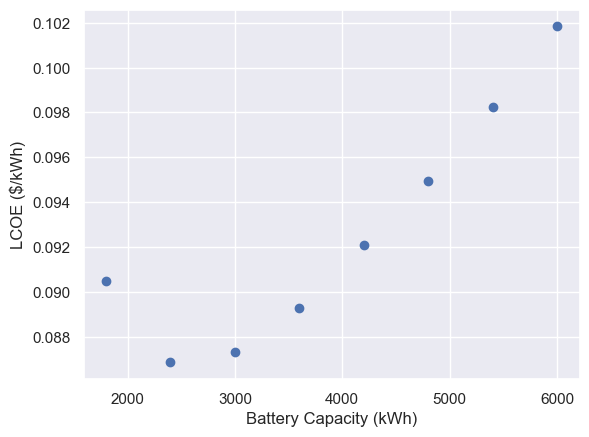

In [5]:
fig, ax = plt.subplots()

x = [i["technologies"]["battery"]["system_capacity_kwh"] for i in cases]
y = [i["lcoe_real"] for i in cases]

ax.scatter(x, y)
ax.set_xlabel("Battery Capacity (kWh)")
ax.set_ylabel("LCOE ($/kWh)")

Text(0, 0.5, 'Turbine Rating (kW)')

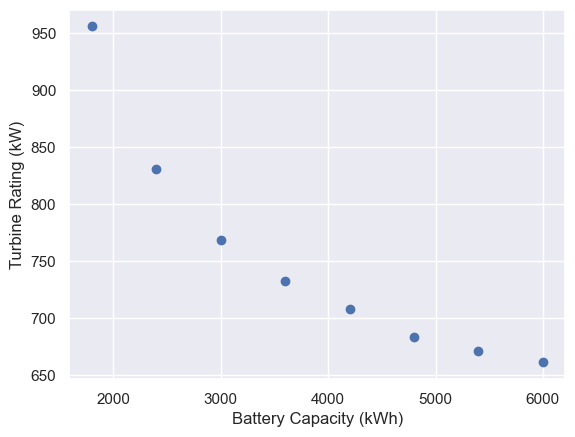

In [6]:
fig, ax = plt.subplots()

x = [i["technologies"]["battery"]["system_capacity_kwh"] for i in cases]
y = [i["technologies"]["wind"]["turbine_rating_kw"] for i in cases]

ax.scatter(x, y)
ax.set_xlabel("Battery Capacity (kWh)")
ax.set_ylabel("Turbine Rating (kW)")

Text(0, 0.5, 'PV Rating (kW)')

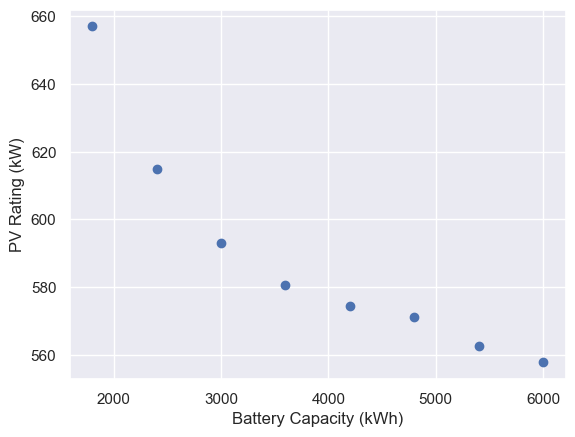

In [7]:
fig, ax = plt.subplots()

x = [i["technologies"]["battery"]["system_capacity_kwh"] for i in cases]
y = [i["technologies"]["pv"]["system_capacity_kw"] for i in cases]

ax.scatter(x, y)
ax.set_xlabel("Battery Capacity (kWh)")
ax.set_ylabel("PV Rating (kW)")

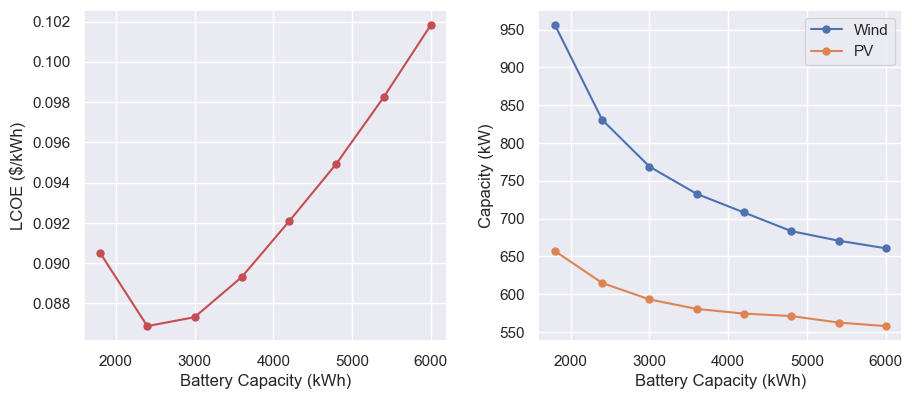

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
fig.tight_layout()
fig.subplots_adjust(wspace=.25)

x = np.array([i["technologies"]["battery"]["system_capacity_kwh"] for i in cases])

y_lcoe = np.array([i["lcoe_real"] for i in cases])

xs = np.argsort(x)
axes[0].plot(x[xs], y_lcoe[xs], color="C3", marker="o", markersize=5)

y_wind = np.array([i["technologies"]["wind"]["turbine_rating_kw"] for i in cases])

axes[1].plot(x[xs], y_wind[xs], label="Wind", marker="o", markersize=5)

y_pv = np.array([i["technologies"]["pv"]["system_capacity_kw"] for i in cases])

axes[1].plot(x[xs], y_pv[xs], label="PV", marker="o", markersize=5)

axes[0].set_xlabel("Battery Capacity (kWh)")
axes[1].set_xlabel("Battery Capacity (kWh)")

axes[0].set_ylabel("LCOE ($/kWh)")
axes[1].set_ylabel("Capacity (kW)")
axes[1].legend()

figs["case_results"] = fig

In [9]:
get_best_case("sweep_battery")

{'case': {'battery_capacity_kw': 600,
  'battery_capacity_kwh': 2400,
  'threshold_kw': 500,
  'missed_allowed': 30},
 'technologies': {'pv': {'system_capacity_kw': 614.8625067773067},
  'wind': {'turbine_rating_kw': 830.7290138727169},
  'battery': {'system_capacity_kw': 600, 'system_capacity_kwh': 2400}},
 'lcoe_real': 0.08687565648758921,
 'avg_missed_peak_load': 30.000000278263393}

In [10]:
if SAVE_FIGS:
    save_figs(figs)